In [1]:
import pandas as pd

df_nickel = pd.read_csv('../Data/nickel.csv')
df_production_consumption = pd.read_csv('../Data/nickel_production_consumption.csv')

In [2]:
# '기준일'컬럼을 날짜 형식으로 변환
df_nickel['기준일'] = pd.to_datetime(df_nickel['기준일'])

df_production_consumption['연도'] = pd.to_datetime(df_production_consumption['연도'], format='%Y')

In [3]:
df_nickel

,기준일,기준가격,재고량,수급안정화지수,환율,생산량,소비량
0,2017-01-01,9984.29,374047,76.63,1169.209961,172.16,174.21
1,2017-02-01,10619.50,381745,78.24,1133.939941,172.16,174.21
2,2017-03-01,10230.43,381883,74.56,1117.020020,172.16,174.21
3,2017-04-01,9668.61,375819,77.10,1135.640015,172.16,174.21
4,2017-05-01,9154.29,380589,80.06,1123.900024,172.16,174.21
...,...,...,...,...,...,...,...
79,2023-08-01,20497.73,37074,28.00,1323.030029,285.77,264.30
80,2023-09-01,19629.05,39516,30.97,1351.930054,285.77,264.30
81,2023-10-01,18255.23,43572,31.98,1348.069946,285.77,264.30
82,2023-11-01,16979.77,43515,41.74,1288.359985,285.77,264.30


In [4]:
df_production_consumption

,연도,생산량,소비량
0,2017-01-01,2065.960,2090.518
1,2018-01-01,2251.992,2339.103
2,2019-01-01,2430.243,2430.139
3,2020-01-01,2528.167,2442.837
4,2021-01-01,2784.683,2962.181
5,2022-01-01,3089.143,3003.505
6,2023-01-01,3429.284,3171.547


## SARIMA

In [88]:
from sarima_utils import *
import warnings
warnings.filterwarnings("ignore")

## 니켈 가격

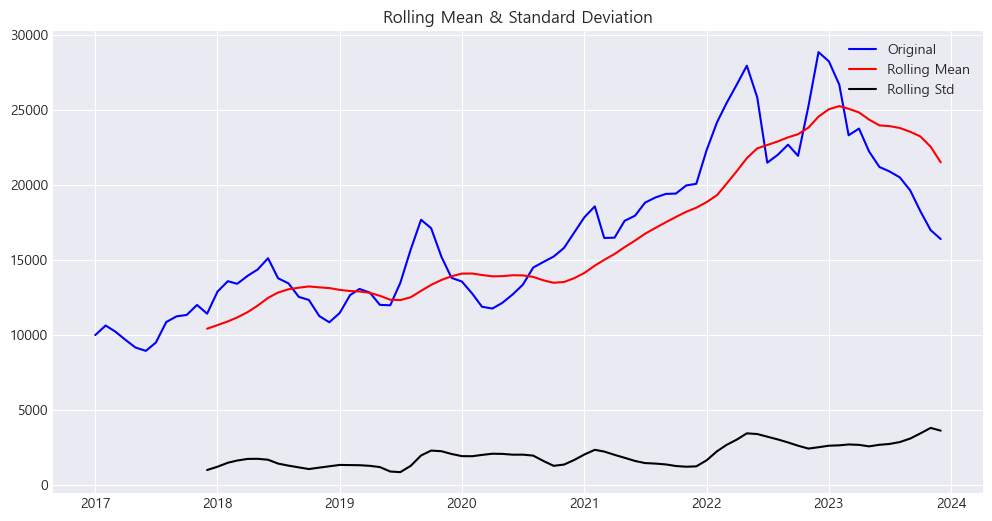

Results of Dickey-Fuller Test:
Test Statistic                 -1.696934
p-value                         0.432693
#Lags Used                      2.000000
Number of Observations Used    81.000000
Critical Value (1%)            -3.513790
Critical Value (5%)            -2.897943
Critical Value (10%)           -2.586191
dtype: float64
데이터는 정상성을 가지지 않습니다.


In [89]:
# 정상성 검정 수행
df_price = df_nickel[['기준일', '기준가격']]
df_price =  df_price.set_index('기준일')['기준가격']
check_stationarity(df_price)

니켈 가격 데이터는 정상성을 만족하지 않으며, 평균이 시간에 따라 변하는 비정상적 시계열로 판단할 수 있음. 

정상성을 확보하기 위해 차분(differencing)이나 로그 변환 등의 전처리 작업이 필요

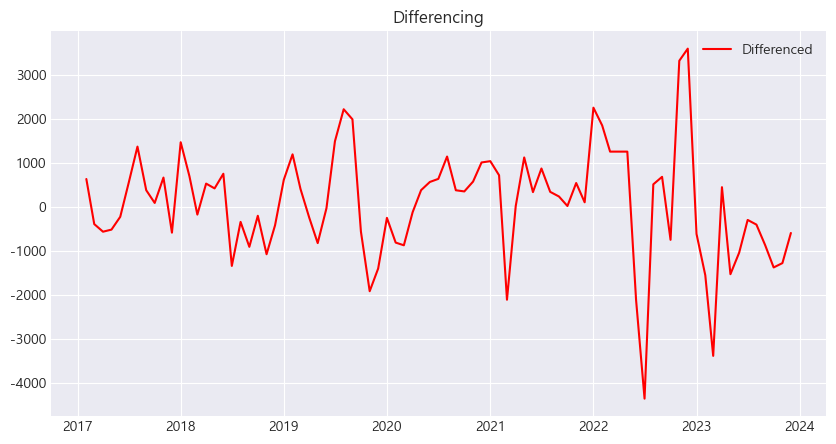

Results of Dickey-Fuller Test:
Test Statistic                -5.981290e+00
p-value                        1.835905e-07
#Lags Used                     1.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64
데이터는 정상성을 가집니다.


In [90]:
differenced_data_1 = differencing_and_adf_test(df_price)

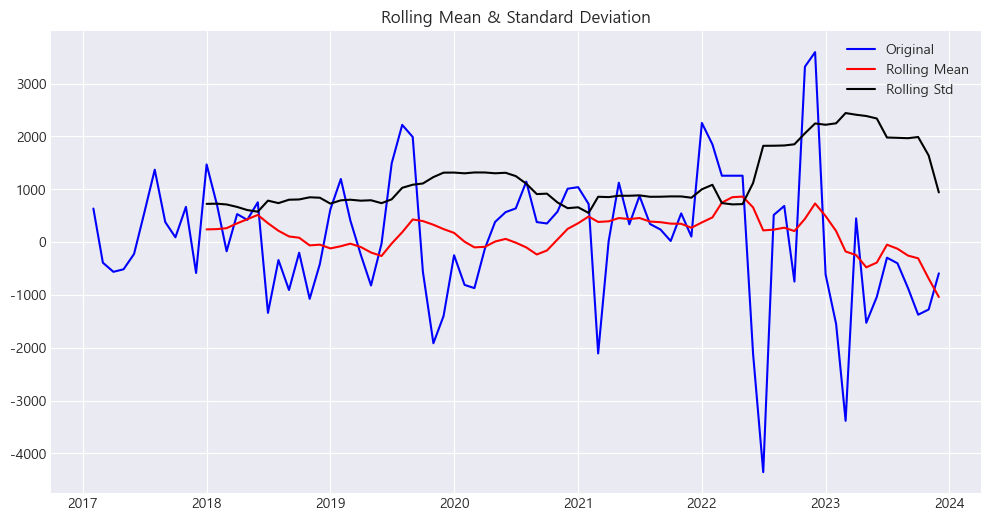

Results of Dickey-Fuller Test:
Test Statistic                -5.981290e+00
p-value                        1.835905e-07
#Lags Used                     1.000000e+00
Number of Observations Used    8.100000e+01
Critical Value (1%)           -3.513790e+00
Critical Value (5%)           -2.897943e+00
Critical Value (10%)          -2.586191e+00
dtype: float64
데이터는 정상성을 가집니다.


In [91]:
check_stationarity(differenced_data_1)

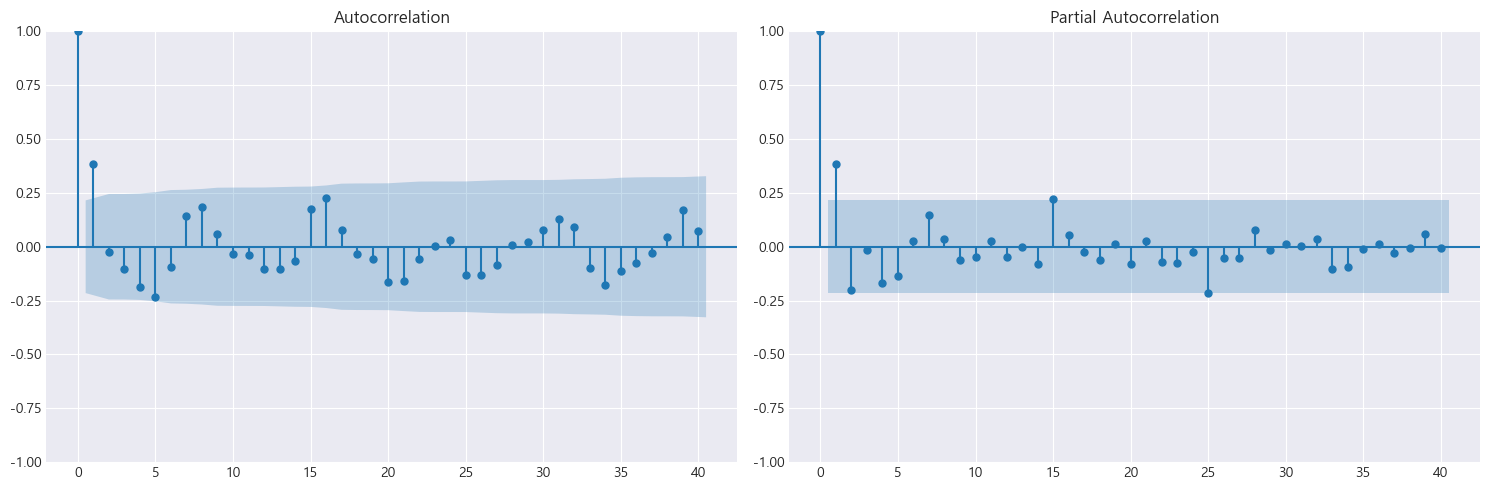

In [92]:
plot_acf_pacf(differenced_data_1,40)

ARIMA(p=1, d=1, q=1) 또는 ARIMA(p=2, d=1, q=1)을 테스트

(P, D, Q, m) = (1, 1, 1, 12)

In [93]:
train, test = train_test_split(df_price)

MAE (Mean Absolute Error): 3334.8275132260965
RMSE (Root Mean Squared Error): 4479.75896538221
MAPE (Mean Absolute Percentage Error): 13.82%


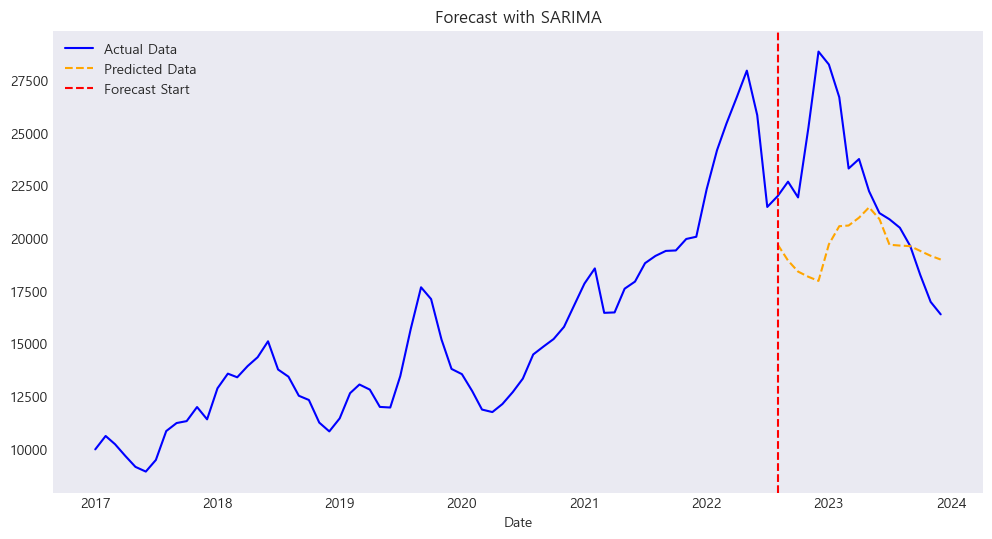

In [94]:
price_forecast, model_summary = sarima_forecast_plot(df_price, 1, 1, 1, 1, 1, 1, 12)

In [95]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               기준가격   No. Observations:                   67
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -458.830
Date:                            Wed, 23 Oct 2024   AIC                            927.659
Time:                                    04:29:21   BIC                            937.604
Sample:                                01-01-2017   HQIC                           931.495
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4305      0.328      1.314      0.189      -0.212       1.073
ma.L1          0.1242      0.333      0.373      0.709      -0.529       0.777
ar.S.L12       0.1939      0.165      1.176      0.240      -0.129       0.517
ma.S.L12      -0.9758      0.198     -4.929      0.000      -1.364      -0.588
sigma2      1.023e+06   2.03e-07   5.05e+12      0.000    1.02e+06    1.02e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):                 6.73
Prob(Q):                              0.65   Prob(JB):                         0.03
Heteroskedasticity (H):               1.52   Skew:                            -0.79
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.51e+29. Standard errors may be unstable.
"""

MAE (Mean Absolute Error): 4511.309695519791
RMSE (Root Mean Squared Error): 5012.27941831046
MAPE (Mean Absolute Percentage Error): 21.82%


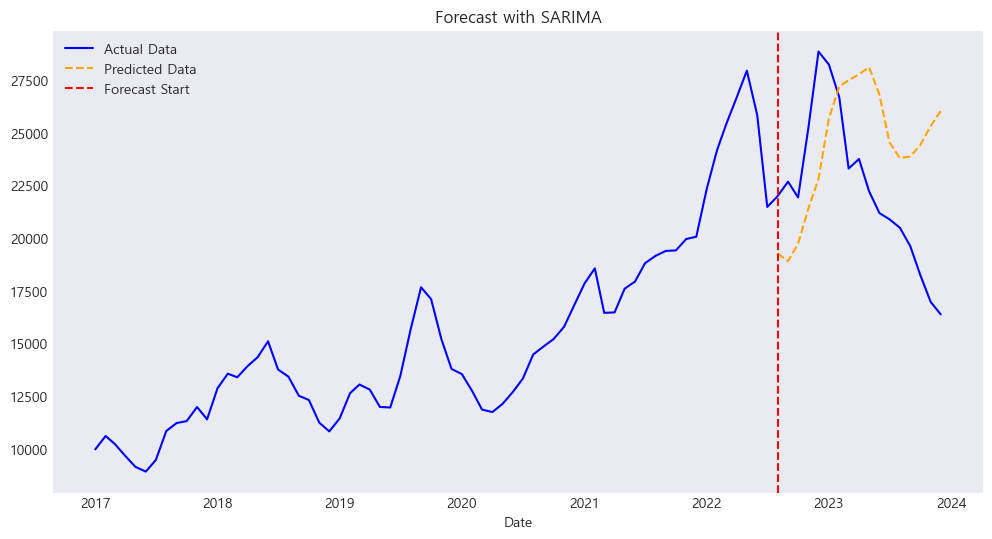

In [96]:
price_forecast, model_summary = sarima_forecast_plot(df_price, 2, 1, 1, 1, 1, 1, 12)

### 하이퍼파라미터 튜닝

In [97]:
from itertools import product

# p, d, q 값의 범위 설정
p = q = range(0, 3)
d = range(0, 2) 

# 계절성 P, D, Q 값의 범위 설정
seasonal_p = seasonal_q = range(0, 3)
seasonal_d = range(0, 2) 
s = [12]  

sarima_param_grid = list(product(p, d, q, seasonal_p, seasonal_d, seasonal_q, s))

best_params = sarima_grid_search(df_price, sarima_param_grid)

Error with parameters (0, 0, 1, 2, 0, 0, 12): LU decomposition error.
Error with parameters (1, 0, 0, 2, 1, 0, 12): LU decomposition error.
Best Parameters: {'order': (1, 0, 0), 'seasonal_order': (0, 1, 1, 12)}
Best RMSE: 3201.684549995801


MAE (Mean Absolute Error): 2338.409300985015
RMSE (Root Mean Squared Error): 3201.684549995801
MAPE (Mean Absolute Percentage Error): 10.31%


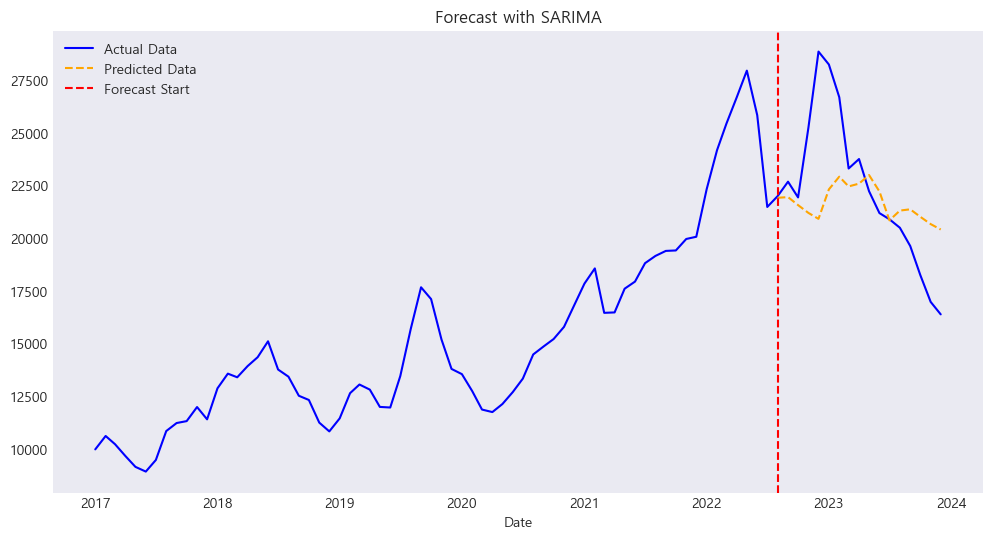

In [98]:
price_forecast, model_summary = train_sarima_with_best_params(df_price, best_params)

In [99]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 기준가격   No. Observations:                   67
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -483.713
Date:                              Wed, 23 Oct 2024   AIC                            973.425
Time:                                      04:30:58   BIC                            979.447
Sample:                                  01-01-2017   HQIC                           975.754
                                       - 07-01-2022                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9555      0.028     34.530      0.000       0.901       1.010
ma.S.L12      -0.6571      0.168     -3.919      0.000      -0.986      -0.328
sigma2      2.246e+06   3.47e-08   6.47e+13      0.000    2.25e+06    2.25e+06
===================================================================================
Ljung-Box (L1) (Q):                   5.24   Jarque-Bera (JB):                25.18
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.08   Skew:                            -1.24
Prob(H) (two-sided):                  0.88   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 예측

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


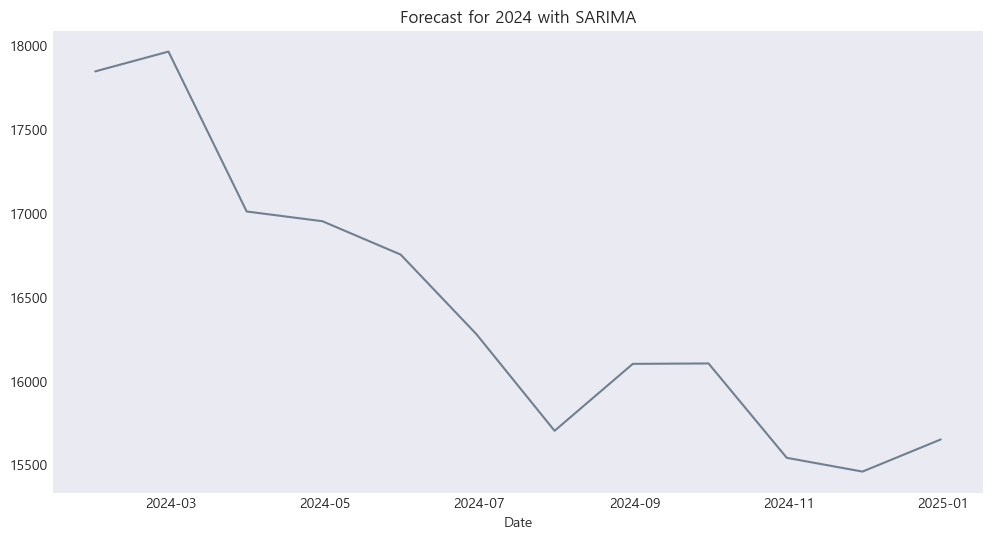

In [100]:
# 2024년 상반기 예측
price_forecast_2024_12m = sarima_forecast_2024(df_price, best_params, 12, 'M', '#708090')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


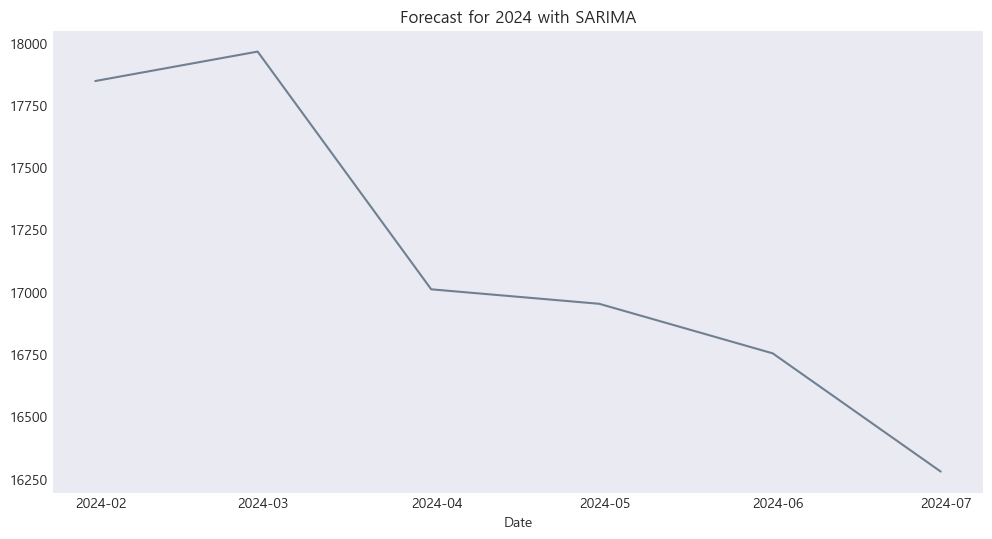

In [101]:
# 2024년 상반기 예측
price_forecast_2024 = sarima_forecast_2024(df_price, best_params, 6, 'M', '#708090')

In [102]:
sarima_2024_forecast = price_forecast_2024['yhat']
sarima_2024_forecast = sarima_2024_forecast.reset_index()
sarima_2024_forecast = sarima_2024_forecast.rename(columns={'index':'기준일','yhat':'니켈가격'})

In [103]:
sarima_2024_forecast

,기준일,니켈가격
0,2024-01-31,17846.456623
1,2024-02-29,17964.622146
2,2024-03-31,17010.595636
3,2024-04-30,16952.513270
4,2024-05-31,16753.570836
5,2024-06-30,16279.108335


In [104]:
sarima_forecast_2024_12m = price_forecast_2024_12m['yhat']
sarima_forecast_2024_12m = sarima_forecast_2024_12m.reset_index()
sarima_forecast_2024_12m = sarima_forecast_2024_12m.rename(columns={'index':'기준일','yhat':'니켈가격'})

In [105]:
sarima_forecast_2024_12m

,기준일,니켈가격
0,2024-01-31,17846.456623
1,2024-02-29,17964.622146
2,2024-03-31,17010.595636
3,2024-04-30,16952.513270
4,2024-05-31,16753.570836
5,2024-06-30,16279.108335
6,2024-07-31,15702.183522
7,2024-08-31,16101.481723
8,2024-09-30,16103.952820
9,2024-10-31,15540.885631


In [106]:
sarima_forecast_2024_12m.to_excel('sarima_forecast_2024_12m.xlsx', index=False)

## 니켈 재고량

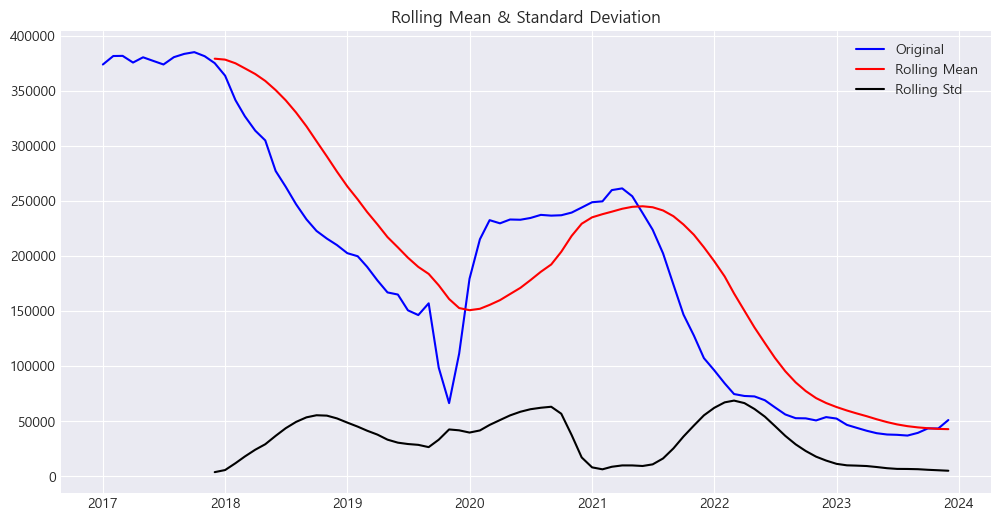

Results of Dickey-Fuller Test:
Test Statistic                 -1.520268
p-value                         0.523462
#Lags Used                      3.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64
데이터는 정상성을 가지지 않습니다.


In [107]:
# 정상성 검정 수행
df_stock = df_nickel[['기준일', '재고량']]
df_stock =  df_stock.set_index('기준일')['재고량']
check_stationarity(df_stock)

재고량 데이터는 정상성을 만족하지 않으며, 평균이 시간에 따라 변하는 비정상적 시계열로 판단할 수 있음. 

정상성을 확보하기 위해 차분(differencing)이나 로그 변환 등의 전처리 작업이 필요

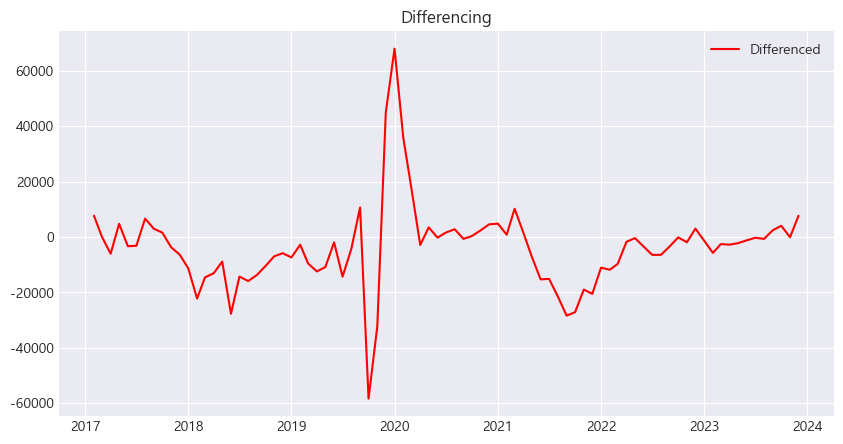

Results of Dickey-Fuller Test:
Test Statistic                 -3.668255
p-value                         0.004582
#Lags Used                      2.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64
데이터는 정상성을 가집니다.


In [108]:
differenced_data_1 = differencing_and_adf_test(df_stock)

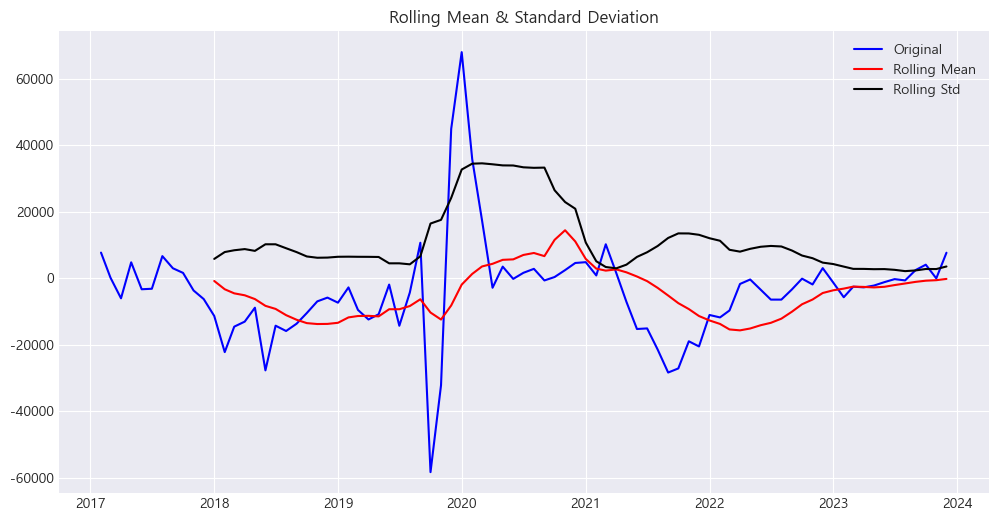

Results of Dickey-Fuller Test:
Test Statistic                 -3.668255
p-value                         0.004582
#Lags Used                      2.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64
데이터는 정상성을 가집니다.


In [109]:
check_stationarity(differenced_data_1)

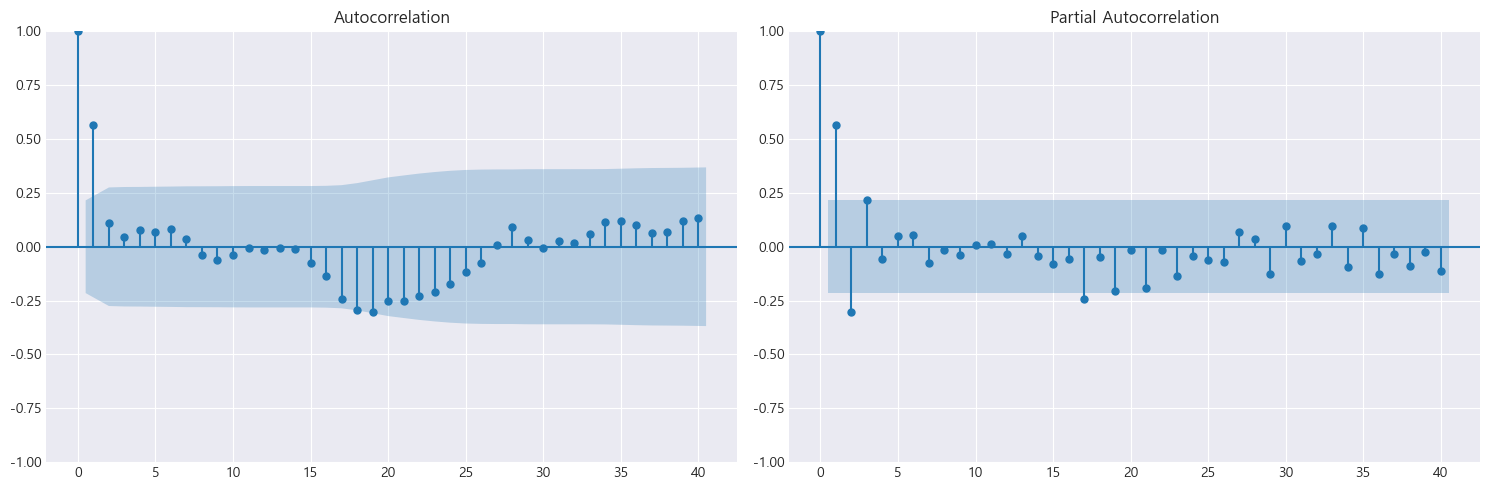

In [110]:
plot_acf_pacf(differenced_data_1, 40)

ARIMA(p=1, d=1, q=1) 또는 ARIMA(p=2, d=1, q=1)을 테스트

(P, D, Q, m) = (1, 1, 1, 12)

In [111]:
train, test = train_test_split(df_stock)

MAE (Mean Absolute Error): 81421.402118194
RMSE (Root Mean Squared Error): 90869.8236116501
MAPE (Mean Absolute Percentage Error): 184.28%


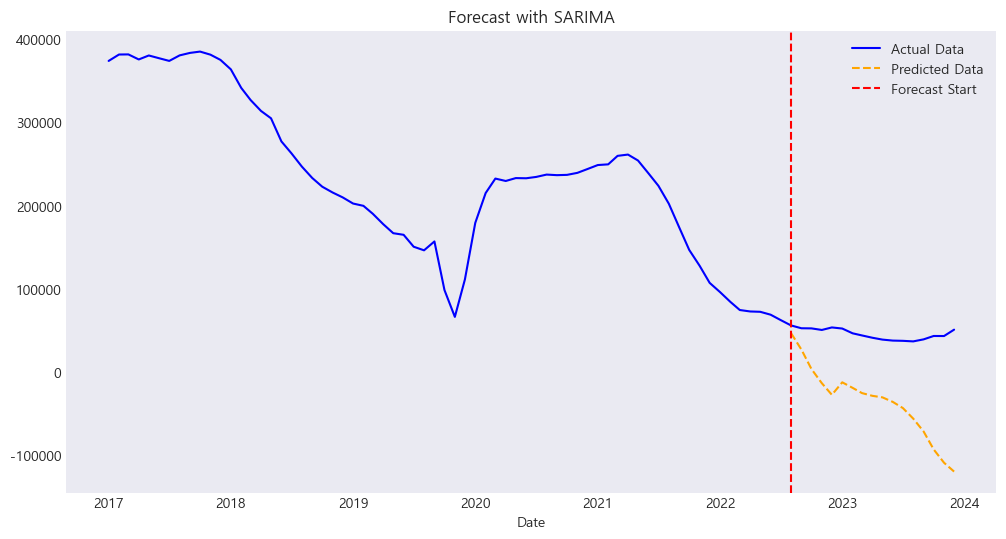

In [112]:
price_forecast, model_summary = sarima_forecast_plot(df_stock, 1, 1, 1, 1, 1, 1, 12)

In [113]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                재고량   No. Observations:                   67
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -614.061
Date:                            Wed, 23 Oct 2024   AIC                           1238.122
Time:                                    04:31:01   BIC                           1248.067
Sample:                                01-01-2017   HQIC                          1241.957
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8059      0.220      3.663      0.000       0.375       1.237
ma.L1         -0.6910      0.248     -2.782      0.005      -1.178      -0.204
ar.S.L12       0.5127      0.073      6.978      0.000       0.369       0.657
ma.S.L12      -0.9461      0.199     -4.757      0.000      -1.336      -0.556
sigma2      4.097e+08   6.29e-10   6.51e+17      0.000     4.1e+08     4.1e+08
===================================================================================
Ljung-Box (L1) (Q):                   5.79   Jarque-Bera (JB):                 8.61
Prob(Q):                              0.02   Prob(JB):                         0.01
Heteroskedasticity (H):               1.40   Skew:                            -0.26
Prob(H) (two-sided):                  0.49   Kurtosis:                         4.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.21e+33. Standard errors may be unstable.
"""

MAE (Mean Absolute Error): 74885.80619250254
RMSE (Root Mean Squared Error): 83451.9522470475
MAPE (Mean Absolute Percentage Error): 169.46%


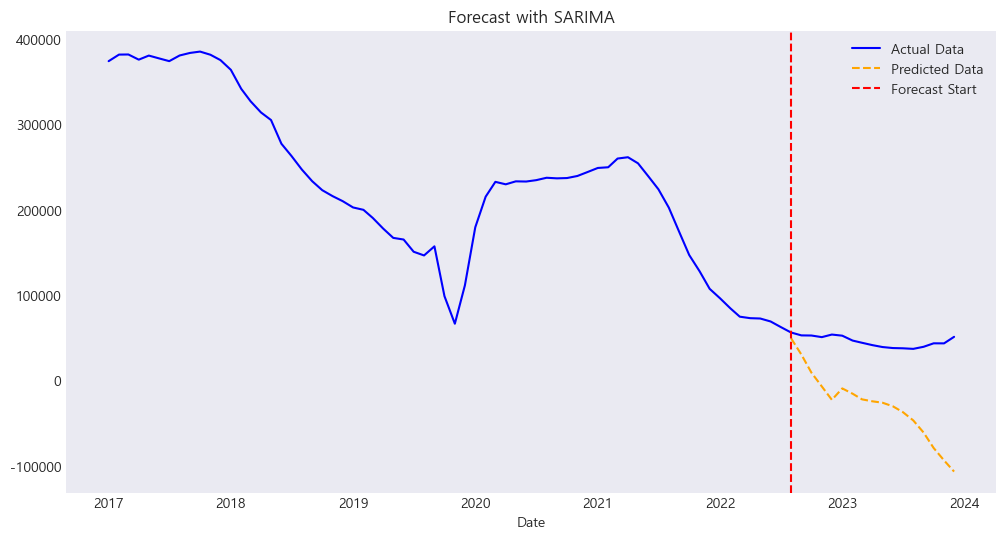

In [114]:
price_forecast, model_summary = sarima_forecast_plot(df_stock, 2, 1, 1, 1, 1, 1, 12)

### 하이퍼파라미터 튜닝

In [115]:
from itertools import product

# p, d, q 값의 범위 설정
p = q = range(0, 3)
d = range(0, 2) 

# 계절성 P, D, Q 값의 범위 설정
seasonal_p = seasonal_q = range(0, 3)
seasonal_d = range(0, 2) 
s = [12]  

sarima_param_grid = list(product(p, d, q, seasonal_p, seasonal_d, seasonal_q, s))

best_params = sarima_grid_search(df_stock, sarima_param_grid)

Error with parameters (2, 1, 2, 2, 1, 0, 12): LU decomposition error.
Best Parameters: {'order': (2, 0, 0), 'seasonal_order': (0, 0, 2, 12)}
Best RMSE: 5732.2935215150555


MAE (Mean Absolute Error): 4874.090978976807
RMSE (Root Mean Squared Error): 5732.2935215150555
MAPE (Mean Absolute Percentage Error): 11.69%


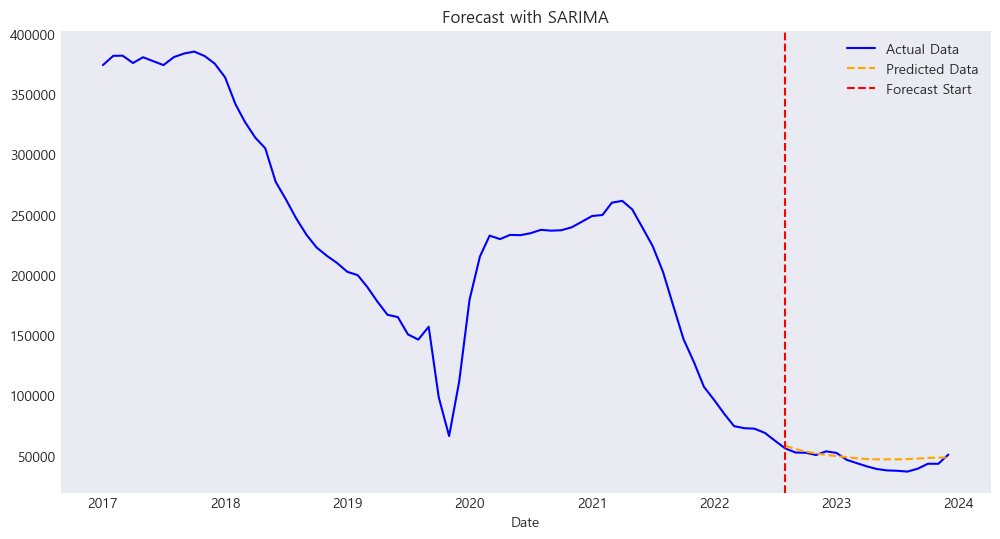

In [116]:
price_forecast, model_summary = train_sarima_with_best_params(df_stock, best_params)

In [117]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                     재고량   No. Observations:                   67
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -737.973
Date:                                 Wed, 23 Oct 2024   AIC                           1485.946
Time:                                         04:32:18   BIC                           1496.969
Sample:                                     01-01-2017   HQIC                          1490.308
                                          - 07-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5866      0.065     24.522      0.000       1.460       1.713
ar.L2         -0.5901      0.065     -9.053      0.000      -0.718      -0.462
ma.S.L12       0.0101      0.449      0.022      0.982      -0.870       0.890
ma.S.L24      -0.0343      0.193     -0.178      0.859      -0.412       0.343
sigma2      1.918e+08   7.54e-10   2.54e+17      0.000    1.92e+08    1.92e+08
===================================================================================
Ljung-Box (L1) (Q):                   1.87   Jarque-Bera (JB):               381.25
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               0.64   Skew:                             0.52
Prob(H) (two-sided):                  0.30   Kurtosis:                        14.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.04e+34. Standard errors may be unstable.
"""

### 예측

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


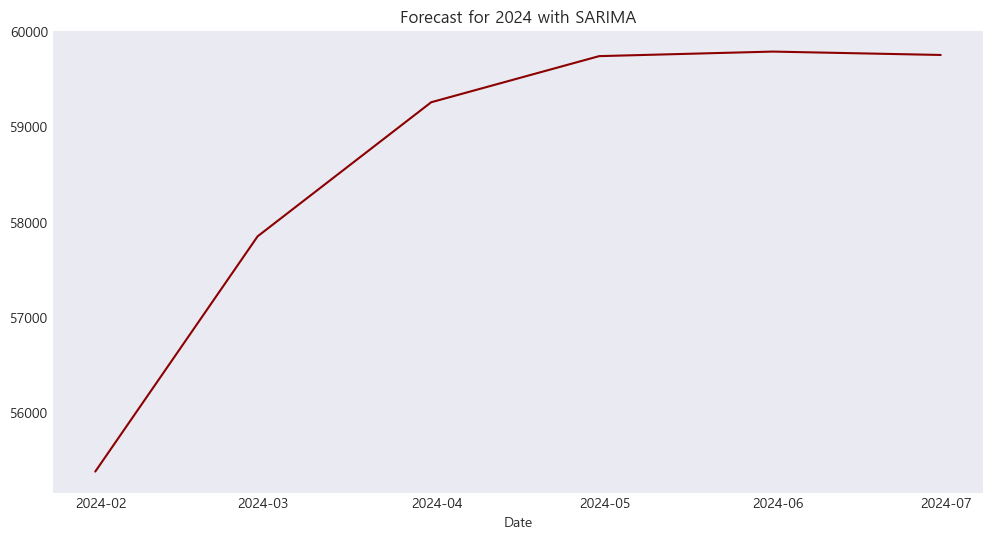

In [118]:
# 2024년 상반기 예측
stock_forecast_2024 = sarima_forecast_2024(df_stock, best_params,6, 'M', '#8B0000')

In [119]:
stock_forecast_2024 = stock_forecast_2024['yhat']
stock_forecast_2024 = stock_forecast_2024.reset_index()
stock_forecast_2024 = stock_forecast_2024.rename(columns={'index':'기준일','yhat':'재고량'})

In [120]:
stock_forecast_2024

,기준일,재고량
0,2024-01-31,55381.796521
1,2024-02-29,57847.596766
2,2024-03-31,59252.726085
3,2024-04-30,59736.041633
4,2024-05-31,59783.686080
5,2024-06-30,59748.211000


In [121]:
sarima_2024_forecast['재고량'] = stock_forecast_2024['재고량']

In [122]:
sarima_2024_forecast

,기준일,니켈가격,재고량
0,2024-01-31,17846.456623,55381.796521
1,2024-02-29,17964.622146,57847.596766
2,2024-03-31,17010.595636,59252.726085
3,2024-04-30,16952.513270,59736.041633
4,2024-05-31,16753.570836,59783.686080
5,2024-06-30,16279.108335,59748.211000


## 환율

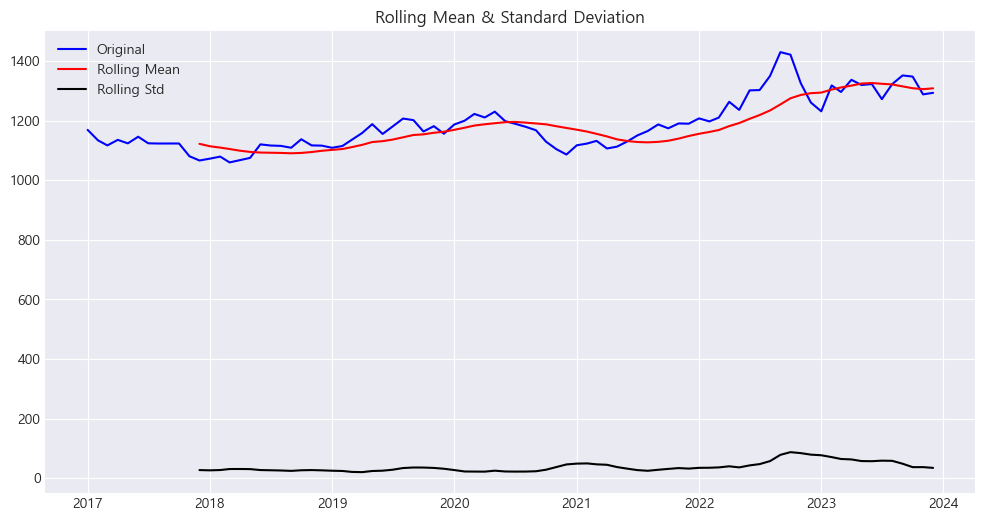

Results of Dickey-Fuller Test:
Test Statistic                 -0.789538
p-value                         0.822176
#Lags Used                      3.000000
Number of Observations Used    80.000000
Critical Value (1%)            -3.514869
Critical Value (5%)            -2.898409
Critical Value (10%)           -2.586439
dtype: float64
데이터는 정상성을 가지지 않습니다.


In [123]:
# 정상성 검정 수행
df_er = df_nickel[['기준일', '환율']]
df_er =  df_er.set_index('기준일')['환율']
check_stationarity(df_er)

환율 데이터는 정상성을 만족하지 않으며, 평균이 시간에 따라 변하는 비정상적 시계열로 판단할 수 있음. 

정상성을 확보하기 위해 차분(differencing)이나 로그 변환 등의 전처리 작업이 필요

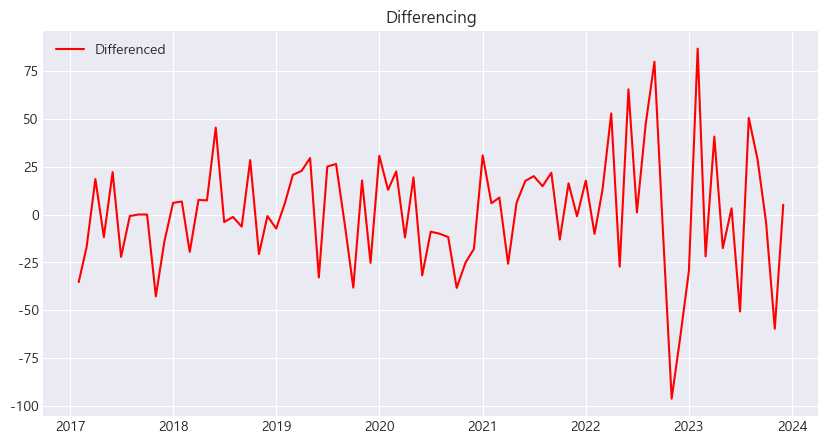

Results of Dickey-Fuller Test:
Test Statistic                -6.958094e+00
p-value                        9.315785e-10
#Lags Used                     2.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64
데이터는 정상성을 가집니다.


In [124]:
differenced_data_1 = differencing_and_adf_test(df_er)

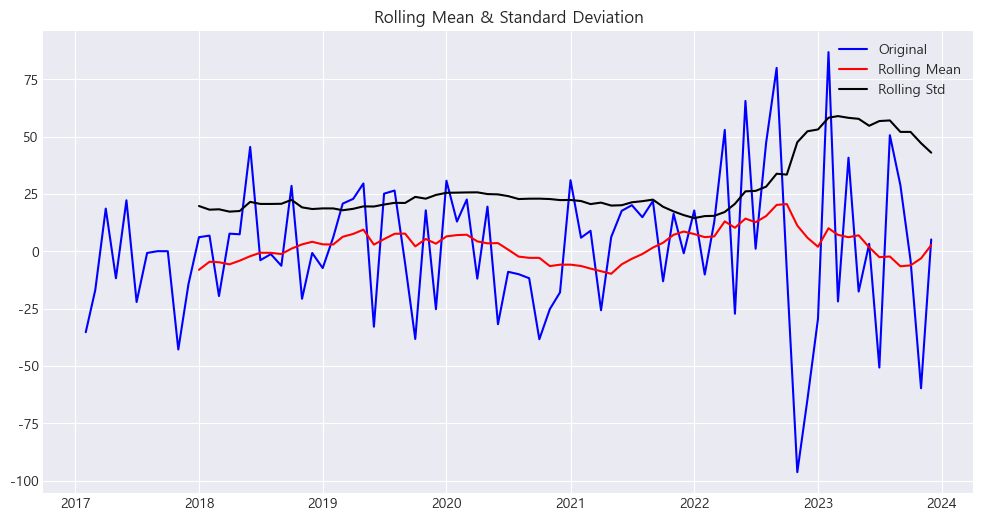

Results of Dickey-Fuller Test:
Test Statistic                -6.958094e+00
p-value                        9.315785e-10
#Lags Used                     2.000000e+00
Number of Observations Used    8.000000e+01
Critical Value (1%)           -3.514869e+00
Critical Value (5%)           -2.898409e+00
Critical Value (10%)          -2.586439e+00
dtype: float64
데이터는 정상성을 가집니다.


In [125]:
check_stationarity(differenced_data_1)

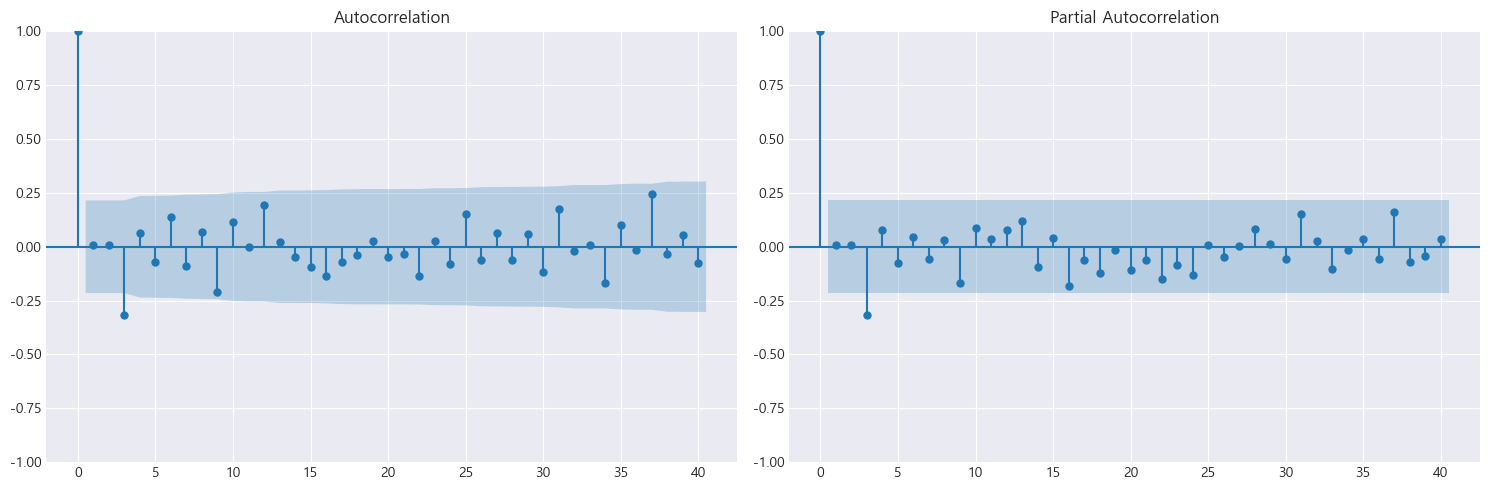

In [126]:
plot_acf_pacf(differenced_data_1,40)

ARIMA(p=1, d=1, q=1) 

(P, D, Q, m) = (1, 1, 1, 12) 테스트

In [127]:
train, test = train_test_split(df_er)

MAE (Mean Absolute Error): 38.735569738890206
RMSE (Root Mean Squared Error): 51.671419694463104
MAPE (Mean Absolute Percentage Error): 2.91%


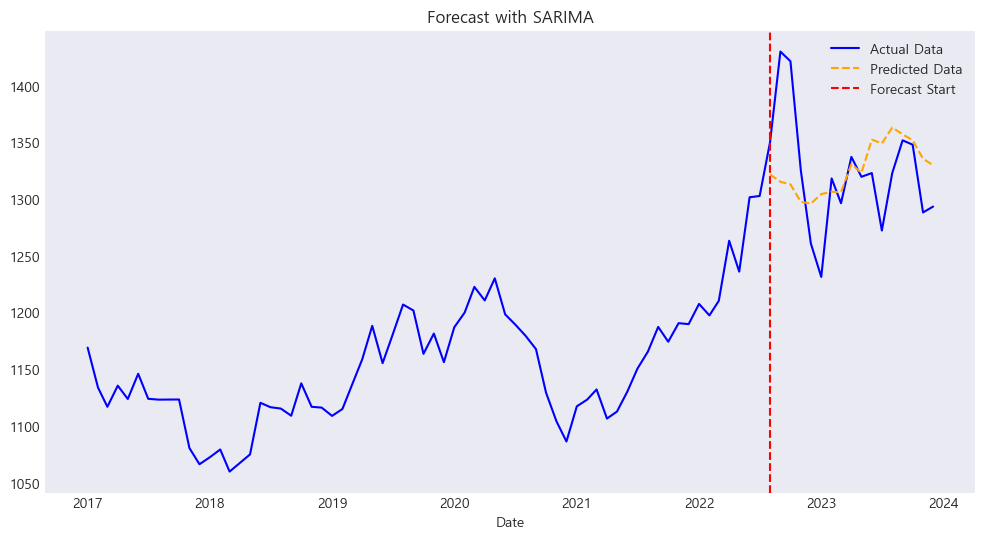

In [128]:
price_forecast, model_summary = sarima_forecast_plot(df_er, 1, 1, 1, 1, 1, 1, 12)

In [129]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                 환율   No. Observations:                   67
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -252.788
Date:                            Wed, 23 Oct 2024   AIC                            515.577
Time:                                    04:32:20   BIC                            525.521
Sample:                                01-01-2017   HQIC                           519.412
                                     - 07-01-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9199      0.218     -4.214      0.000      -1.348      -0.492
ma.L1          0.7866      0.257      3.064      0.002       0.283       1.290
ar.S.L12       0.1657      0.354      0.468      0.640      -0.529       0.860
ma.S.L12      -0.9987    129.115     -0.008      0.994    -254.060     252.063
sigma2       498.7299   6.43e+04      0.008      0.994   -1.25e+05    1.26e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.88   Prob(JB):                         0.62
Heteroskedasticity (H):               1.18   Skew:                            -0.32
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 하이퍼파라미터 튜닝

In [130]:
from itertools import product

# p, d, q 값의 범위 설정
p = q = range(0, 3)
d = range(0, 2) 

# 계절성 P, D, Q 값의 범위 설정
seasonal_p = seasonal_q = range(0, 3)
seasonal_d = range(0, 2) 
s = [12]  

sarima_param_grid = list(product(p, d, q, seasonal_p, seasonal_d, seasonal_q, s))

best_params = sarima_grid_search(df_er, sarima_param_grid)

Best Parameters: {'order': (2, 0, 1), 'seasonal_order': (1, 1, 2, 12)}
Best RMSE: 47.42260057062177


MAE (Mean Absolute Error): 33.6740863254883
RMSE (Root Mean Squared Error): 47.42260057062177
MAPE (Mean Absolute Percentage Error): 2.52%


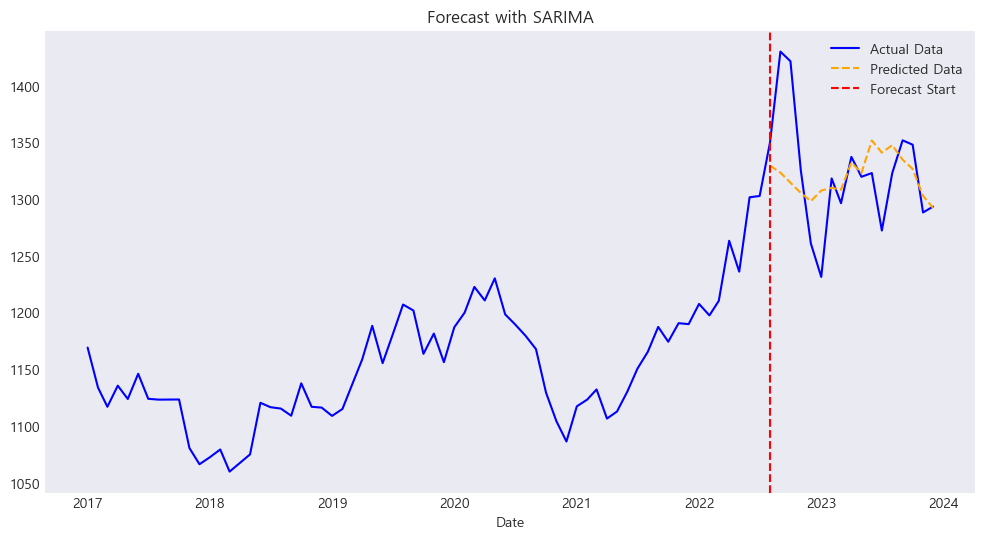

In [131]:
price_forecast, model_summary = train_sarima_with_best_params(df_er, best_params)

In [132]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                      환율   No. Observations:                   67
Model:             SARIMAX(2, 0, 1)x(1, 1, [1, 2], 12)   Log Likelihood                -257.319
Date:                                 Wed, 23 Oct 2024   AIC                            528.637
Time:                                         04:33:58   BIC                            542.689
Sample:                                     01-01-2017   HQIC                           534.071
                                          - 07-01-2022                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1238      0.444      0.279      0.780      -0.746       0.993
ar.L2          0.8678      0.471      1.841      0.066      -0.056       1.792
ma.L1          0.7049      0.307      2.295      0.022       0.103       1.307
ar.S.L12      -0.6801      0.733     -0.927      0.354      -2.117       0.757
ma.S.L12      -0.0016     81.860  -1.97e-05      1.000    -160.445     160.441
ma.S.L24      -0.9936     55.914     -0.018      0.986    -110.582     108.595
sigma2       410.0318   2.29e+04      0.018      0.986   -4.45e+04    4.53e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                 0.58
Prob(Q):                              0.66   Prob(JB):                         0.75
Heteroskedasticity (H):               1.12   Skew:                            -0.25
Prob(H) (two-sided):                  0.82   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 예측

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


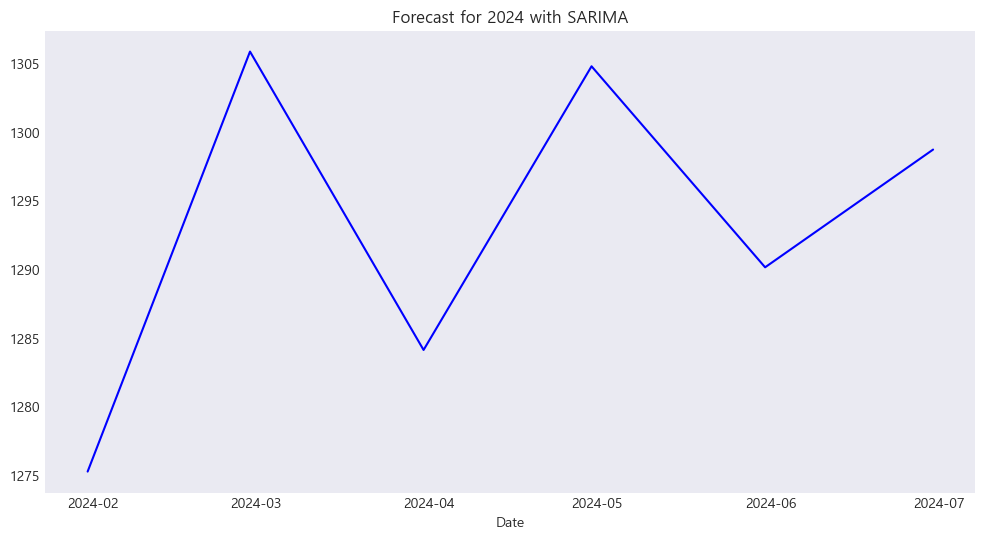

In [133]:
# 2024년 상반기 예측
er_forecast_2024 = sarima_forecast_2024(df_er, best_params, 6, 'M', 'blue')

In [134]:
er_forecast_2024 = er_forecast_2024['yhat']
er_forecast_2024 = er_forecast_2024.reset_index()
er_forecast_2024 = er_forecast_2024.rename(columns={'index':'기준일','yhat':'환율'})

In [135]:
er_forecast_2024

,기준일,환율
0,2024-01-31,1275.281224
1,2024-02-29,1305.833380
2,2024-03-31,1284.128270
3,2024-04-30,1304.763692
4,2024-05-31,1290.141627
5,2024-06-30,1298.705786


In [136]:
sarima_2024_forecast['환율'] = er_forecast_2024['환율']

In [137]:
sarima_2024_forecast

,기준일,니켈가격,재고량,환율
0,2024-01-31,17846.456623,55381.796521,1275.281224
1,2024-02-29,17964.622146,57847.596766,1305.833380
2,2024-03-31,17010.595636,59252.726085,1284.128270
3,2024-04-30,16952.513270,59736.041633,1304.763692
4,2024-05-31,16753.570836,59783.686080,1290.141627
5,2024-06-30,16279.108335,59748.211000,1298.705786


In [138]:
sarima_2024_forecast.to_csv('sarima_2024_forecast.csv', index=False)

## 생산량

In [139]:
df_production_consumption

,연도,생산량,소비량
0,2017-01-01,2065.960,2090.518
1,2018-01-01,2251.992,2339.103
2,2019-01-01,2430.243,2430.139
3,2020-01-01,2528.167,2442.837
4,2021-01-01,2784.683,2962.181
5,2022-01-01,3089.143,3003.505
6,2023-01-01,3429.284,3171.547


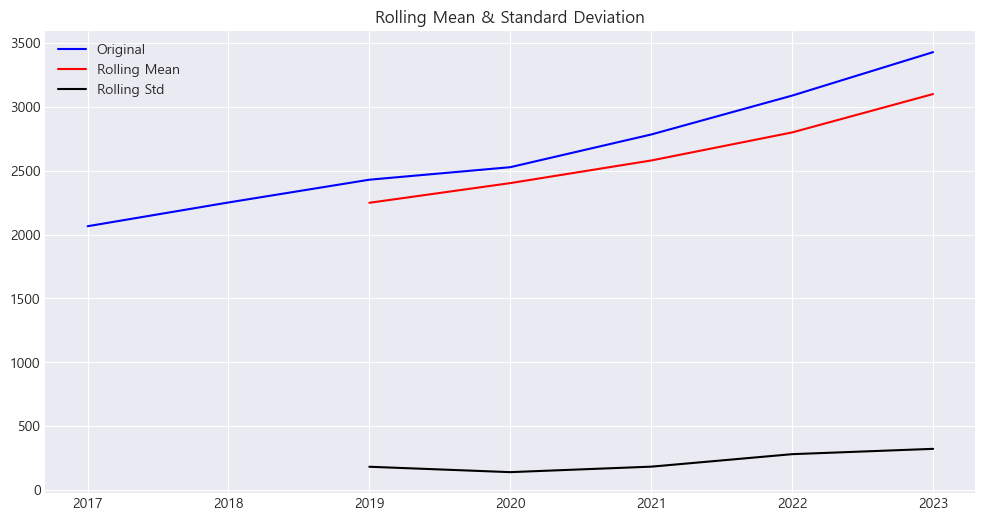

Results of Dickey-Fuller Test:
Test Statistic                 2.450515
p-value                        0.999032
#Lags Used                     0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64
데이터는 정상성을 가지지 않습니다.


In [140]:
# 정상성 검정 수행
df_production = df_production_consumption[['연도', '생산량']]
df_production =  df_production.set_index('연도')['생산량']
check_stationarity_production_consumption(df_production)

정상성을 만족하지 않으며, 평균이 시간에 따라 변하는 비정상적 시계열로 판단할 수 있음. 

정상성을 확보하기 위해 차분(differencing)이나 로그 변환 등의 전처리 작업이 필요

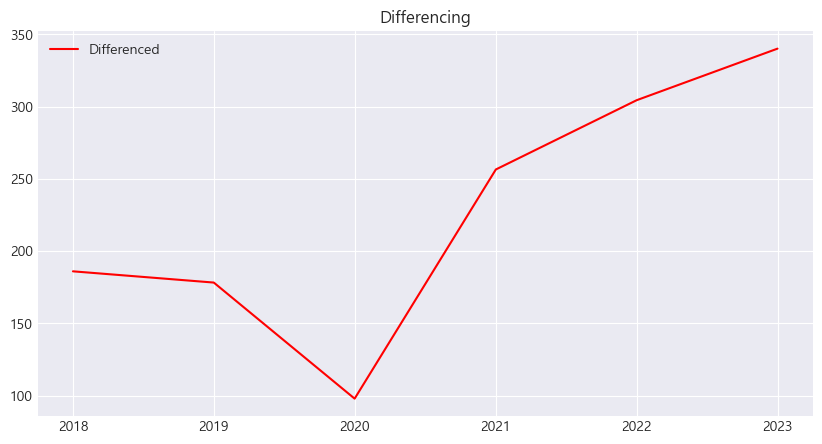

Results of Dickey-Fuller Test:
Test Statistic                -0.567491
p-value                        0.878160
#Lags Used                     0.000000
Number of Observations Used    5.000000
Critical Value (1%)           -6.045114
Critical Value (5%)           -3.929280
Critical Value (10%)          -2.986810
dtype: float64
데이터는 정상성을 가지지 않습니다.


In [141]:
differenced_data_1 = differencing_and_adf_test(df_production)

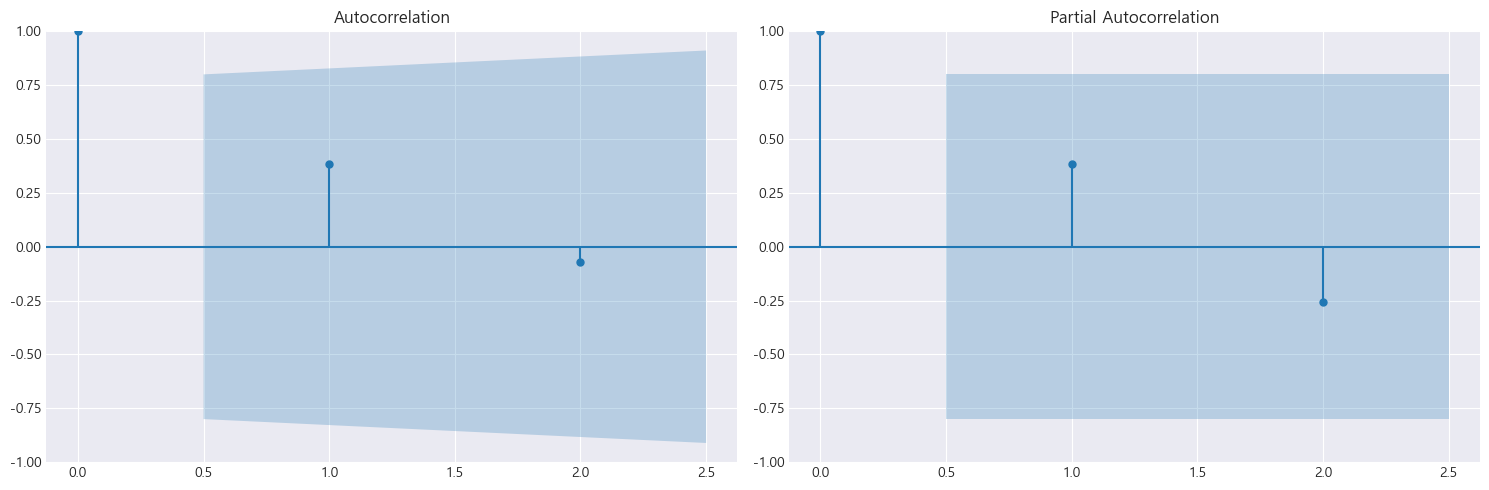

In [142]:
plot_acf_pacf(differenced_data_1,2)

In [143]:
train, test = train_test_split(df_production)

MAE (Mean Absolute Error): 474.5305000000001
RMSE (Root Mean Squared Error): 504.08647115400754
MAPE (Mean Absolute Percentage Error): 14.33%


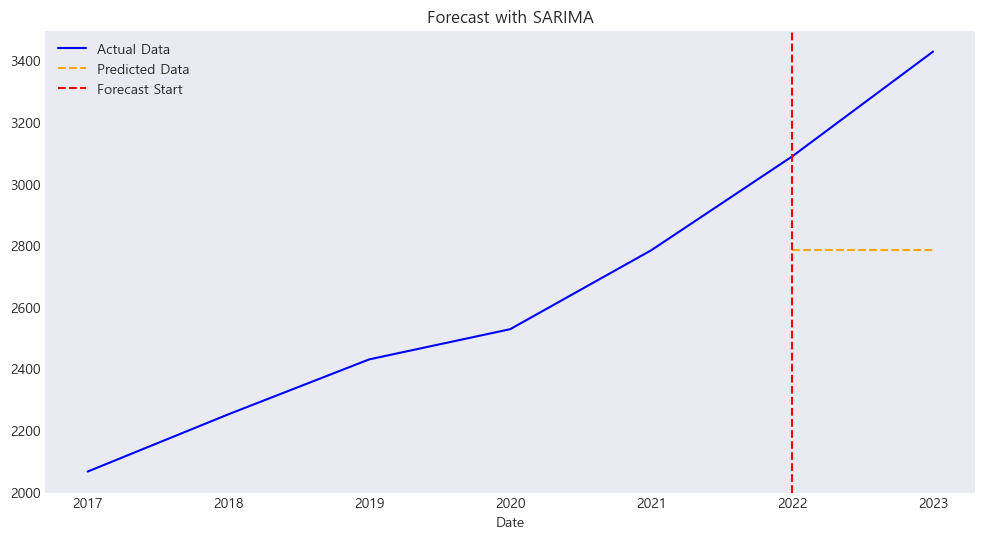

In [144]:
price_forecast, model_summary = sarima_forecast_plot(df_production, 1, 1, 1, 1, 1, 1, 12)

In [145]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                생산량   No. Observations:                    5
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Wed, 23 Oct 2024   AIC                             10.000
Time:                                    04:34:00   BIC                                nan
Sample:                                01-01-2017   HQIC                               nan
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

### 하이퍼파라미터 튜닝

In [146]:
from itertools import product

# p, d, q 값의 범위 설정
p = q = range(0, 3)
d = range(0, 2) 

# 계절성 P, D, Q 값의 범위 설정
seasonal_p = seasonal_q = range(0, 3)
seasonal_d = range(0, 2) 
s = [12]  

sarima_param_grid = list(product(p, d, q, seasonal_p, seasonal_d, seasonal_q, s))

best_params = sarima_grid_search(df_production, sarima_param_grid)

Error with parameters (0, 0, 0, 1, 1, 0, 12): Schur decomposition solver error.
Error with parameters (0, 0, 0, 2, 1, 0, 12): Schur decomposition solver error.
Error with parameters (0, 1, 0, 1, 1, 0, 12): Schur decomposition solver error.
Error with parameters (0, 1, 0, 2, 1, 0, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 0, 1, 0, 12): Input contains NaN.
Error with parameters (1, 0, 0, 0, 1, 1, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 0, 1, 2, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 1, 1, 0, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 1, 1, 1, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 1, 1, 2, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 2, 1, 0, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 2, 1, 1, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 2, 1, 2, 12): Schur de

MAE (Mean Absolute Error): 57.60623678921661
RMSE (Root Mean Squared Error): 59.67915311171759
MAPE (Mean Absolute Percentage Error): 1.80%


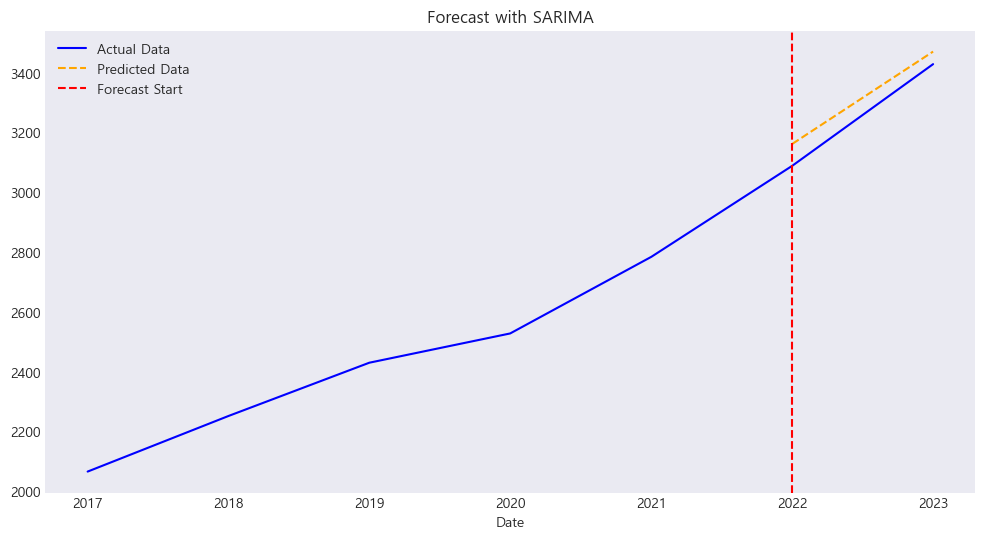

In [147]:
price_forecast, model_summary = train_sarima_with_best_params(df_production, best_params)

In [148]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                     생산량   No. Observations:                    5
Model:             SARIMAX(2, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood                 -39.487
Date:                                 Wed, 23 Oct 2024   AIC                             90.975
Time:                                         04:35:06   BIC                             88.631
Sample:                                     01-01-2017   HQIC                            84.685
                                          - 01-01-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9499    232.768      0.008      0.993    -454.266     458.166
ar.L2         -0.9684    254.106     -0.004      0.997    -499.007     497.071
ma.L1          0.9589     38.608      0.025      0.980     -74.712      76.630
ma.S.L12       1.9291   6326.987      0.000      1.000   -1.24e+04    1.24e+04
ma.S.L24       0.9754   1.34e+04   7.26e-05      1.000   -2.64e+04    2.64e+04
sigma2       485.0762     14.202     34.155      0.000     457.241     512.912
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                 0.84
Prob(Q):                              0.35   Prob(JB):                         0.66
Heteroskedasticity (H):              16.48   Skew:                             1.00
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.27e+21. Standard errors may be unstable.
"""

### 예측

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


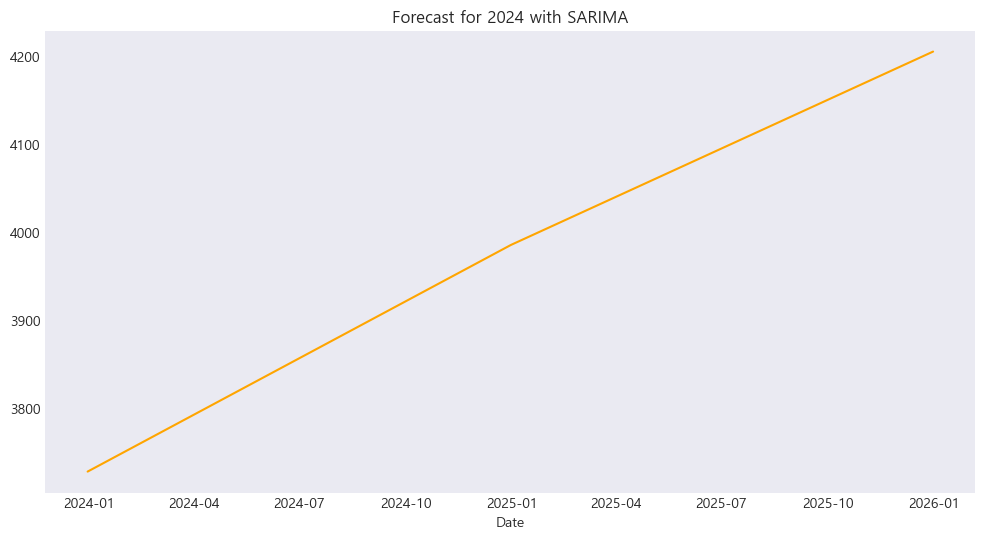

In [149]:
# 2024년 상반기 예측
production_forecast_2024 = sarima_forecast_2024(df_production, best_params, 3, 'Y', 'orange')

In [150]:
production_forecast_2024 = production_forecast_2024['yhat']
production_forecast_2024 = production_forecast_2024.reset_index()
production_forecast_2024 = production_forecast_2024.rename(columns={'index':'기준일','yhat':'생산량'})

In [151]:
production_forecast_2024

,기준일,생산량
0,2023-12-31,3727.905865
1,2024-12-31,3985.244068
2,2025-12-31,4204.785952


In [152]:
sarima_2024_forecast_production_consumption = production_forecast_2024.copy()

In [153]:
sarima_2024_forecast_production_consumption

,기준일,생산량
0,2023-12-31,3727.905865
1,2024-12-31,3985.244068
2,2025-12-31,4204.785952


## 소비량

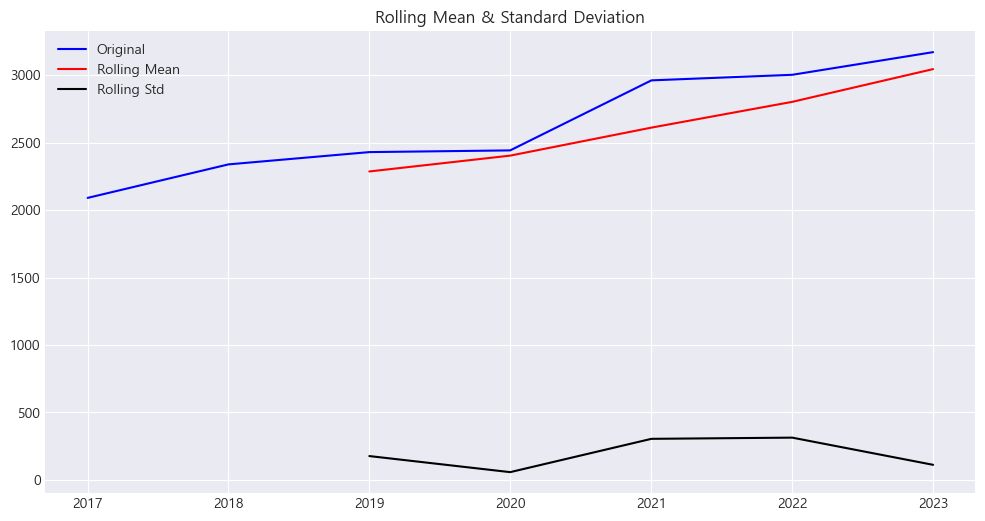

Results of Dickey-Fuller Test:
Test Statistic                -0.561254
p-value                        0.879499
#Lags Used                     0.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64
데이터는 정상성을 가지지 않습니다.


In [154]:
# 정상성 검정 수행
df_consumption = df_production_consumption[['연도', '소비량']]
df_consumption =  df_consumption.set_index('연도')['소비량']
check_stationarity_production_consumption(df_consumption)

정상성을 만족하지 않으며, 평균이 시간에 따라 변하는 비정상적 시계열로 판단할 수 있음. 

정상성을 확보하기 위해 차분(differencing)이나 로그 변환 등의 전처리 작업이 필요

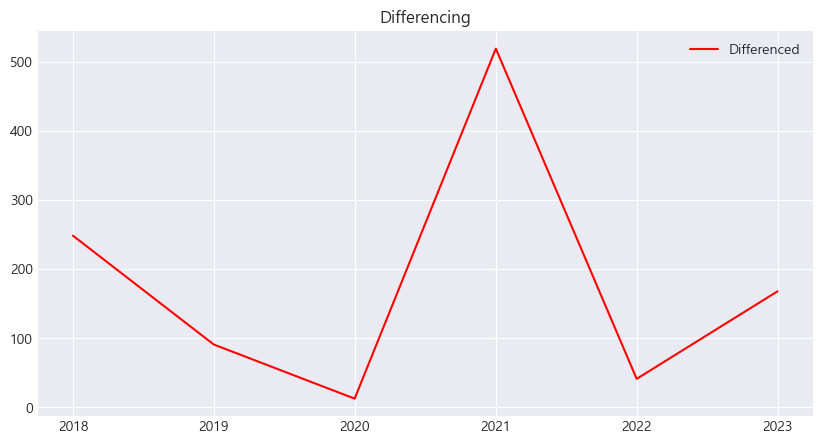

Results of Dickey-Fuller Test:
Test Statistic                -1.849670
p-value                        0.356095
#Lags Used                     1.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64
데이터는 정상성을 가지지 않습니다.


In [155]:
differenced_data_1 = differencing_and_adf_test(df_consumption)

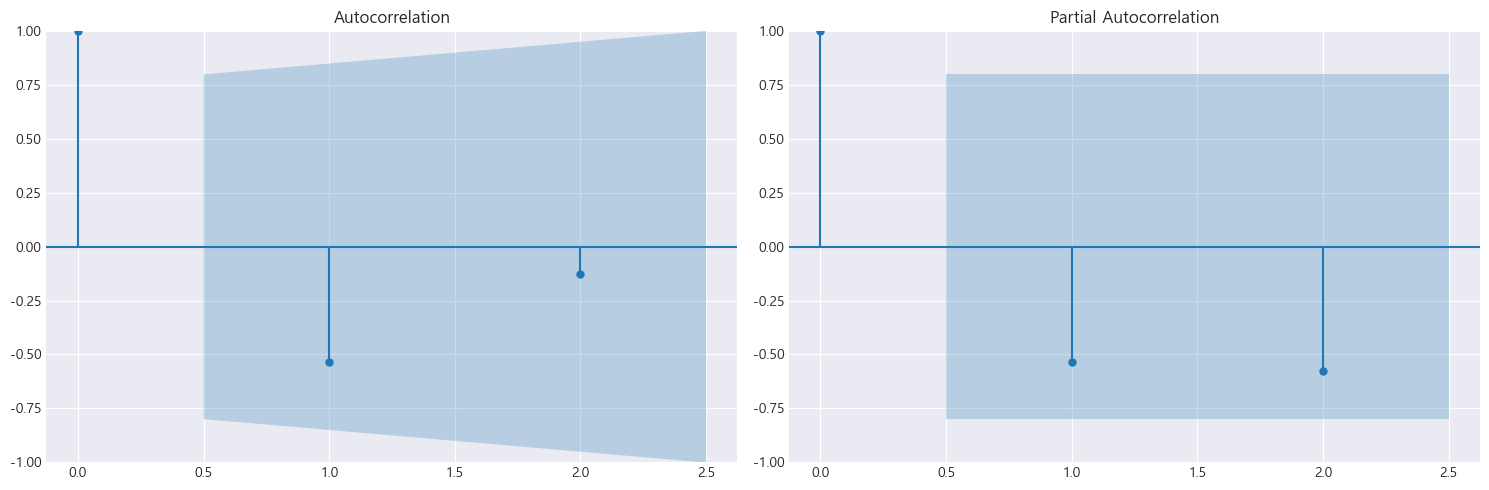

In [156]:
plot_acf_pacf(differenced_data_1,2)

In [157]:
train, test = train_test_split(df_consumption)

MAE (Mean Absolute Error): 125.34499999999957
RMSE (Root Mean Squared Error): 150.90028981416796
MAPE (Mean Absolute Percentage Error): 3.99%


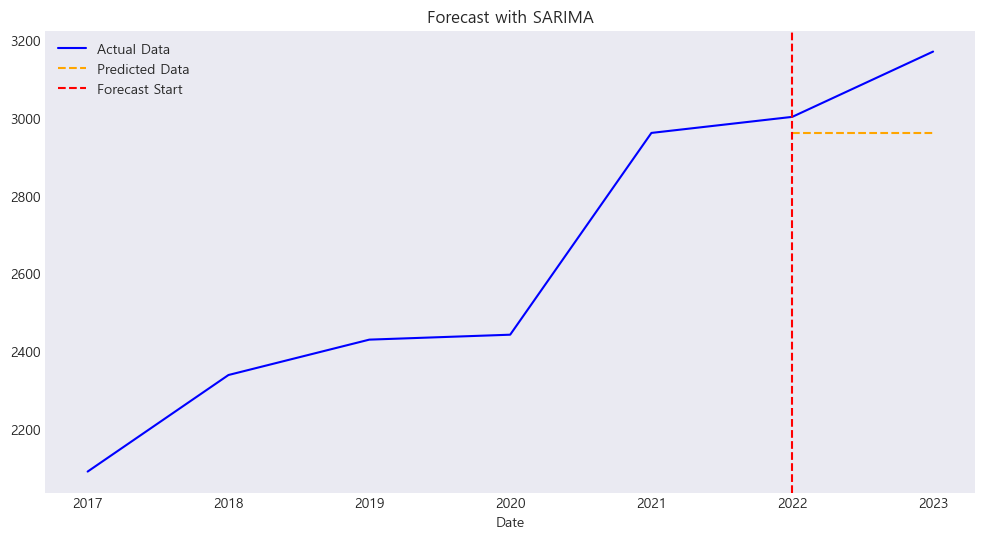

In [158]:
price_forecast, model_summary = sarima_forecast_plot(df_consumption, 1, 1, 1, 1, 1, 1, 12)

In [159]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                소비량   No. Observations:                    5
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Wed, 23 Oct 2024   AIC                             10.000
Time:                                    04:35:08   BIC                                nan
Sample:                                01-01-2017   HQIC                               nan
                                     - 01-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0         -0        nan        nan           0           0
ma.L1               0         -0        nan        nan           0           0
ar.S.L12            0         -0        nan        nan           0           0
ma.S.L12            0         -0        nan        nan           0           0
sigma2         1.0000         -0       -inf      0.000       1.000       1.000
===================================================================================
Ljung-Box (L1) (Q):                    nan   Jarque-Bera (JB):                  nan
Prob(Q):                               nan   Prob(JB):                          nan
Heteroskedasticity (H):                nan   Skew:                              nan
Prob(H) (two-sided):                   nan   Kurtosis:                          nan
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

### 하이퍼파라미터 튜닝

In [160]:
from itertools import product

# p, d, q 값의 범위 설정
p = q = range(0, 3)
d = range(0, 2) 

# 계절성 P, D, Q 값의 범위 설정
seasonal_p = seasonal_q = range(0, 3)
seasonal_d = range(0, 2) 
s = [12]  

sarima_param_grid = list(product(p, d, q, seasonal_p, seasonal_d, seasonal_q, s))

best_params = sarima_grid_search(df_consumption, sarima_param_grid)

Error with parameters (0, 0, 0, 1, 1, 0, 12): Schur decomposition solver error.
Error with parameters (0, 0, 0, 2, 1, 0, 12): Schur decomposition solver error.
Error with parameters (0, 1, 0, 1, 1, 0, 12): Schur decomposition solver error.
Error with parameters (0, 1, 0, 2, 1, 0, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 0, 1, 0, 12): Input contains NaN.
Error with parameters (1, 0, 0, 0, 1, 1, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 0, 1, 2, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 1, 1, 0, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 1, 1, 1, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 1, 1, 2, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 2, 1, 0, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 2, 1, 1, 12): Schur decomposition solver error.
Error with parameters (1, 0, 0, 2, 1, 2, 12): Schur de

MAE (Mean Absolute Error): 30.854858288410924
RMSE (Root Mean Squared Error): 32.488719011926136
MAPE (Mean Absolute Percentage Error): 1.01%


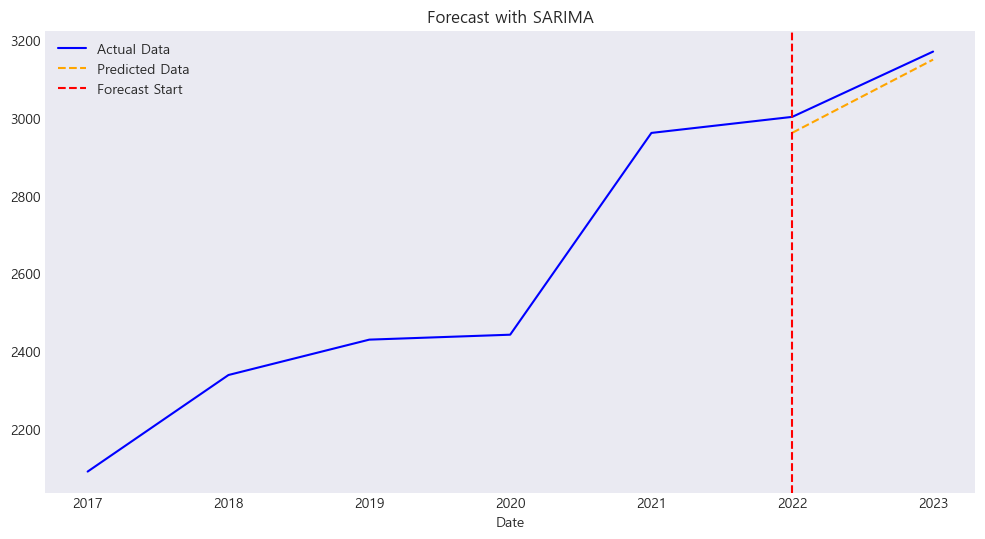

In [161]:
price_forecast, model_summary = train_sarima_with_best_params(df_consumption, best_params)

In [162]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                 소비량   No. Observations:                    5
Model:             SARIMAX(1, 1, 2)x(2, 0, [], 12)   Log Likelihood                 -27.492
Date:                             Wed, 23 Oct 2024   AIC                             66.983
Time:                                     04:36:15   BIC                             63.301
Sample:                                 01-01-2017   HQIC                            58.903
                                      - 01-01-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9552      4.687      0.204      0.839      -8.231      10.141
ma.L1         -1.6624     17.523     -0.095      0.924     -36.007      32.682
ma.L2          0.9298     10.668      0.087      0.931     -19.979      21.839
ar.S.L12       0.3665     91.124      0.004      0.997    -178.233     178.966
ar.S.L24      -0.0004    197.542  -1.82e-06      1.000    -387.176     387.175
sigma2      2.345e+04      0.028   8.42e+05      0.000    2.35e+04    2.35e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.87   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.35   Prob(JB):                         0.84
Heteroskedasticity (H):                nan   Skew:                             0.01
Prob(H) (two-sided):                   nan   Kurtosis:                         1.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.52e+23. Standard errors may be unstable.
"""

### 예측

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


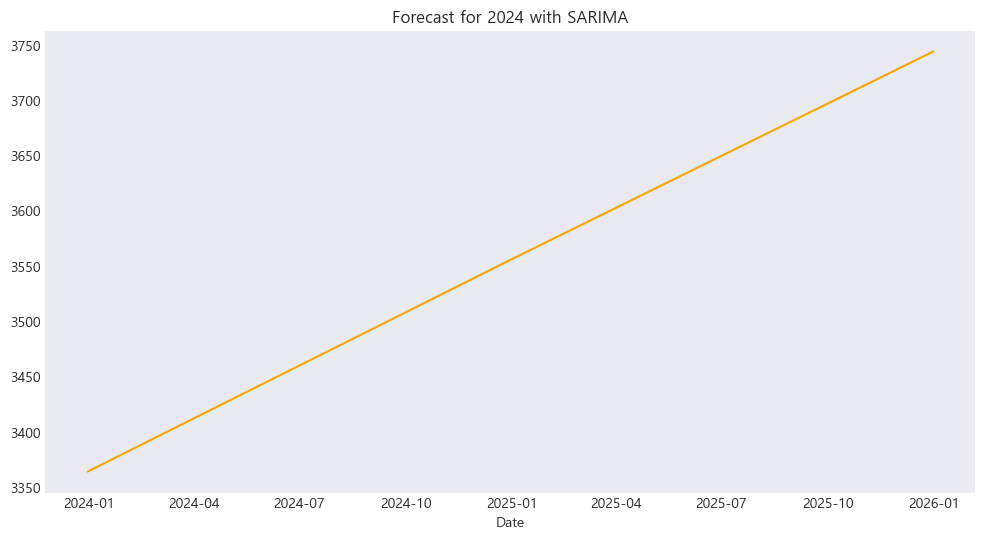

In [163]:
# 2024년 상반기 예측
consumption_forecast_2024 = sarima_forecast_2024(df_consumption, best_params, 3, 'Y', 'orange')

In [164]:
consumption_forecast_2024 = consumption_forecast_2024['yhat']
consumption_forecast_2024 = consumption_forecast_2024.reset_index()
consumption_forecast_2024 = consumption_forecast_2024.rename(columns={'index':'기준일','yhat':'소비량'})

In [165]:
consumption_forecast_2024

,기준일,소비량
0,2023-12-31,3364.106097
1,2024-12-31,3555.840719
2,2025-12-31,3743.901704


In [166]:
sarima_2024_forecast_production_consumption['소비량'] = consumption_forecast_2024['소비량']

In [167]:
sarima_2024_forecast_production_consumption

,기준일,생산량,소비량
0,2023-12-31,3727.905865,3364.106097
1,2024-12-31,3985.244068,3555.840719
2,2025-12-31,4204.785952,3743.901704


In [168]:
sarima_2024_forecast_production_consumption.to_csv('sarima_2024_forecast_production_consumption.csv',index=False)

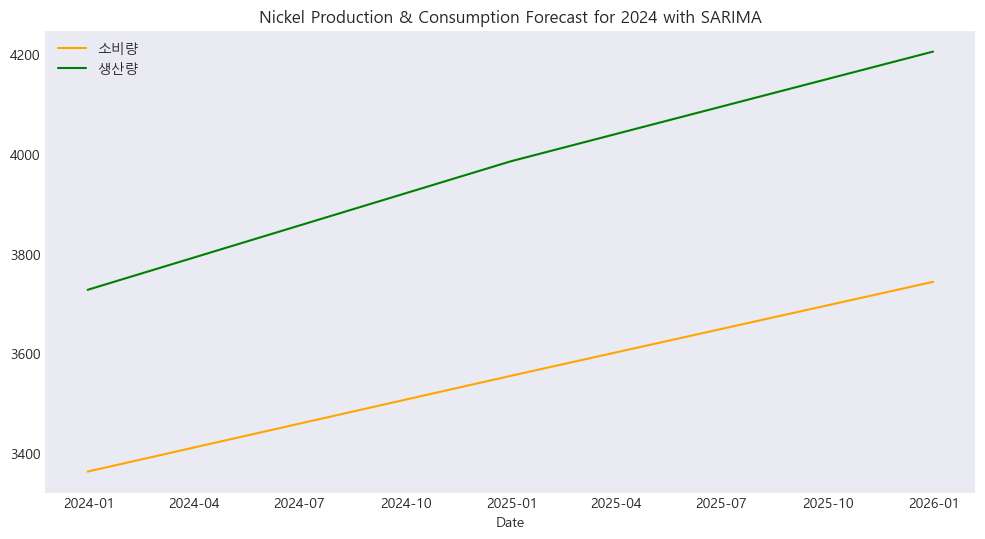

In [169]:
# 8. 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.plot(sarima_2024_forecast_production_consumption['기준일'], sarima_2024_forecast_production_consumption['소비량'], label='소비량',  color='orange')
plt.plot(sarima_2024_forecast_production_consumption['기준일'], sarima_2024_forecast_production_consumption['생산량'], label='생산량', color='green')
# plt.axvline(x=df_price['기준일'].iloc[-1], color='red', linestyle='--', label='Forecast Start')
# plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='lightgreen', alpha=0.4)
plt.title('Nickel Production & Consumption Forecast for 2024 with SARIMA')
plt.xlabel('Date')
plt.ylabel('')
plt.legend()
plt.grid()
plt.show()